<a href="https://colab.research.google.com/github/wes-curl/lab-2-phase-2-wes-curl/blob/main/Copy_of_DATA_301_Lab_2B_Evidence_of_Discrimination%3F_Wesley_Curl_and_Vicky_Lam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `https://dlsun.github.io/pods/data/ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

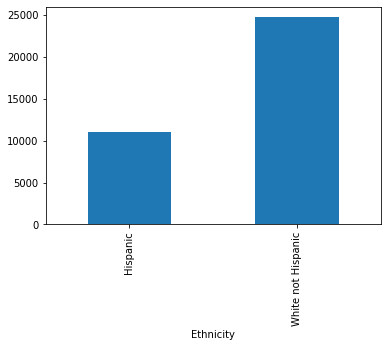

In [1]:
import pandas as pd

location = "https://dlsun.github.io/pods/data/"
df_dds = pd.read_csv(location + "ca_dds_expenditures.csv")

df_white = df_dds[df_dds["Ethnicity"] == "White not Hispanic"]
df_hispanic = df_dds[df_dds["Ethnicity"] == "Hispanic"]

df_dds_white_and_hispanic = df_white.append(df_hispanic)

df_dds_white_and_hispanic.groupby(["Ethnicity"])["Expenditures"].mean().plot.bar()

It appears that White (not Hispanic) students received just short of \$25K on average, while Hispanic students recieved a little more than \$10K on average.

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

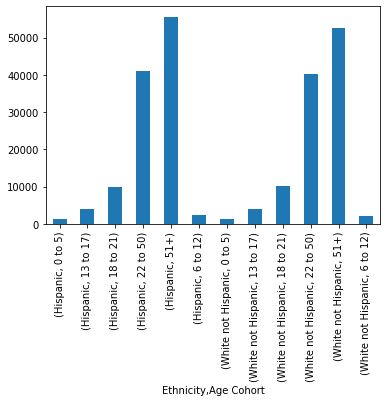

In [2]:
df_dds_white_and_hispanic.groupby(["Ethnicity", "Age Cohort"])["Expenditures"].mean().plot.bar()

Oddly, it appears that funding by age for both groups is near identical! Each cohort seems to get nearly the same funding, regardless of race. White students in the 51+ category seem to actually recieve less than their Hispanic counterparts!

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

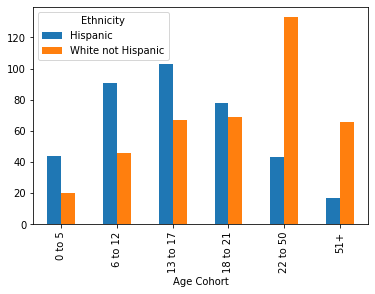

In [3]:
df_dds_white_and_hispanic.groupby(["Ethnicity", "Age Cohort"], sort=True)["Id"].count().unstack("Ethnicity").loc[["0 to 5","6 to 12","13 to 17","18 to 21","22 to 50","51+"]].plot.bar()

The first thing to look at is the age of each ethnicity. The distribution of Hispanics among the age cohorts is left-skewed, that is, Hispanics in the study tend to be younger. Their largest group is in the 13-17 range. The distribution of non-hispanic Caucasians is right skewed, with their largest category being the 22-50 range.

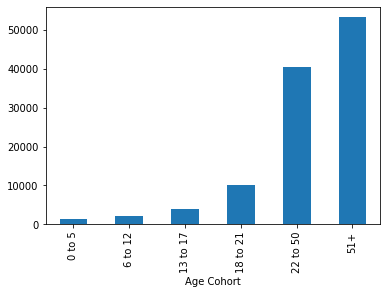

In [4]:
df_dds_white_and_hispanic.groupby(["Age Cohort"])["Expenditures"].mean().loc[["0 to 5","6 to 12","13 to 17","18 to 21","22 to 50","51+"]].plot.bar()

Notably, as people get older, the average expenditure on them grows. This especially accelerates at the 22 to 50 age cohort—the largest cohort among non-Hispanic Caucasians! </br> 
As people get older, the expenditures on them get larger, and as non-hispanic Caucasians tend to be older, their expenditures thusly tend to be larger. This explains the discrepency: the first plot did not adjust for age cohort size, and simply found that net spending on Hispanics was lower. The second plot demonstrates that, adjusting for age cohort, expenditures on the two groups are equal.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2B - YOUR NAME HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.